In [4]:
#Load Data
import tensorflow as tf
minst = tf.keras.datasets.mnist
(X_train, Y_train),(X_test, Y_test) = minst.load_data()
X_train, X_test = X_train/255, X_test/255

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
#Build model

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [7]:
#Train Model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2544 - accuracy: 0.9271 - val_loss: 0.1301 - val_accuracy: 0.9619
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1146 - accuracy: 0.9658 - val_loss: 0.1005 - val_accuracy: 0.9683
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0795 - accuracy: 0.9763 - val_loss: 0.0873 - val_accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0603 - accuracy: 0.9817 - val_loss: 0.0795 - val_accuracy: 0.9753
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0470 - accuracy: 0.9853 - val_loss: 0.0855 - val_accuracy: 0.9738
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0374 - accuracy: 0.9885 - val_loss: 0.0689 - val_accuracy: 0.9788
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0295 - accuracy: 0.9909 - val_loss: 0.0779 - val_accurac

In [8]:
#Evaluate Model

In [9]:
#Make Predictions
P_test = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [10]:
P_test

array([[1.3734552e-11, 1.8167383e-10, 2.4912243e-09, ..., 9.9997526e-01,
        4.1272952e-10, 4.5584596e-08],
       [5.3292679e-11, 3.1387077e-09, 9.9999982e-01, ..., 2.3261025e-19,
        1.0416101e-07, 2.3560238e-15],
       [1.7048931e-08, 9.9755591e-01, 1.9070159e-05, ..., 4.3882224e-05,
        2.3753985e-03, 7.6531217e-09],
       ...,
       [3.8332595e-15, 1.8907610e-12, 3.8320502e-13, ..., 9.4770920e-09,
        2.2671425e-06, 1.6976160e-06],
       [1.3423964e-09, 5.6367810e-12, 1.2504658e-13, ..., 1.0991745e-11,
        5.2693915e-05, 7.0199888e-15],
       [3.3947822e-09, 1.6425987e-17, 2.3800220e-10, ..., 3.4799328e-15,
        1.3399081e-14, 2.0056529e-13]], dtype=float32)

In [11]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

In [14]:
cm = confusion_matrix(Y_test, P_test)

In [15]:
P_test = P_test.argmax(axis=1)

AxisError: ignored

In [16]:
Y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
cm

In [17]:
misclassified_idx = np.where(Y_test!=P_test)

In [20]:
misclassified_idx[0]

array([ 115,  149,  151,  217,  241,  247,  321,  358,  381,  445,  495,
        582,  610,  613,  619,  659,  684,  691,  707,  717,  720,  813,
        846,  890,  950,  951,  956, 1014, 1039, 1044, 1112, 1182, 1194,
       1226, 1232, 1242, 1247, 1290, 1299, 1319, 1328, 1356, 1393, 1395,
       1494, 1522, 1531, 1549, 1554, 1609, 1681, 1709, 1717, 1754, 1878,
       1901, 1913, 1941, 1982, 1984, 1992, 2004, 2018, 2043, 2044, 2053,
       2098, 2109, 2118, 2130, 2135, 2174, 2182, 2185, 2224, 2266, 2272,
       2280, 2293, 2369, 2387, 2406, 2408, 2414, 2462, 2488, 2607, 2618,
       2654, 2659, 2730, 2836, 2896, 2938, 2939, 2953, 3005, 3073, 3117,
       3189, 3225, 3405, 3503, 3520, 3558, 3565, 3567, 3662, 3718, 3727,
       3749, 3751, 3780, 3796, 3811, 3818, 3838, 3893, 3902, 3906, 3926,
       3941, 3985, 4017, 4065, 4078, 4140, 4199, 4201, 4224, 4248, 4250,
       4289, 4294, 4425, 4443, 4497, 4500, 4505, 4534, 4536, 4551, 4571,
       4601, 4723, 4740, 4751, 4761, 4807, 4814, 48

In [23]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'True label: 7 , Predicted: 2')

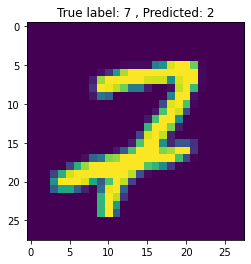

In [34]:
i = np.random.choice(misclassified_idx[0])
plt.imshow(X_test[i])
plt.title("True label: %s , Predicted: %s" %(Y_test[i], P_test[i]))